# House Value Prediction EDA
This notebook is used to perform Exploratory Data Analysis on the dataset provided by the real estate agency

# Install Dependecies

In [2]:
%pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Load the Data
Each row (20640 rows) represents one district. There are 14 attributes/feature per district

In [3]:
import pandas as pd

dataset_path = "../../dataset/raw/California_Houses.csv" # Change this to the path of your dataset

houses_df = pd.read_csv(dataset_path)
houses_df.head(n=15)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
8,226700.0,2.0804,42,2555,665,1206,595,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584
9,261100.0,3.6912,52,3549,707,1551,714,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


# Quick Description of the data

| Feauture Name | Description |
|---------------|-------------|
|Median_House_Value|Median house value for household within a block (measured in USD) [prediction target]|
|Median_Income|Median income for households within a block of houses (measured in tens of thousands of USD) [10k$]|
|Median_Age|Median age of a house within a block; a lower number is a newer building [years]|
|Tot_Rooms|Total number of rooms within a block|
|Tot_Bedrooms|Total number of bedrooms within a block|
|Population|Total number of people residing within a block|
|Households|Total number of households, a group of people residing within a home unit, for a block|
|Latitude|A measure of how far north a house is; a higher value is farther north [°]|
|Longitude|A measure of how far west a house is; a higher value is farther west [°]|
|Distance_to_coast|Distance to the nearest coast point [m]|
|Distance_to_LA|Distance to the centre of Los Angeles [m]|
|Distance_to_SanDiego|Distance to the centre of San Diego [m]|
|Distance_to_SanJose|Distance to the centre of San Jose [m]|
|Distance_to_SanFrancisco|Distance to the centre of San Francisco [m]|

We observe that:
* All features are numerical
* There are no missing value in any feature (the `non-null` is equal to the total number of rows)

In [4]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [5]:
houses_df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


# Histogram Plot

we observe that:
* **Median_Income** has a long tail distribution - salary of people is more or less normally distributed with a few folks getting a high salary.
* **Median_Age** has more or less a uniform distribution.
* The range for features, **Tot_Rooms**, **Tot_Bedrooms**, **Population**, **Households**, is large and it contains a small number of large values (as there are unnoticeable bins on the right int the histogram plots of these features). That would mean that there could be certain outlier values present in these features.
* **Latitude**, **Longitude**, **Distance_to_coast**, **Distance_to_LA**, **Distance_to_SanDiego**, , **Distance_to_SanJose**, and **Distance_to_SanFrancisco** carry geographical information. Their combination help us decide the price of the house.
* **Median_House_Value** also has a long tail distribution. It spikes towards the end. The reason is that the houses with price more than 500000 are given a value of 500000

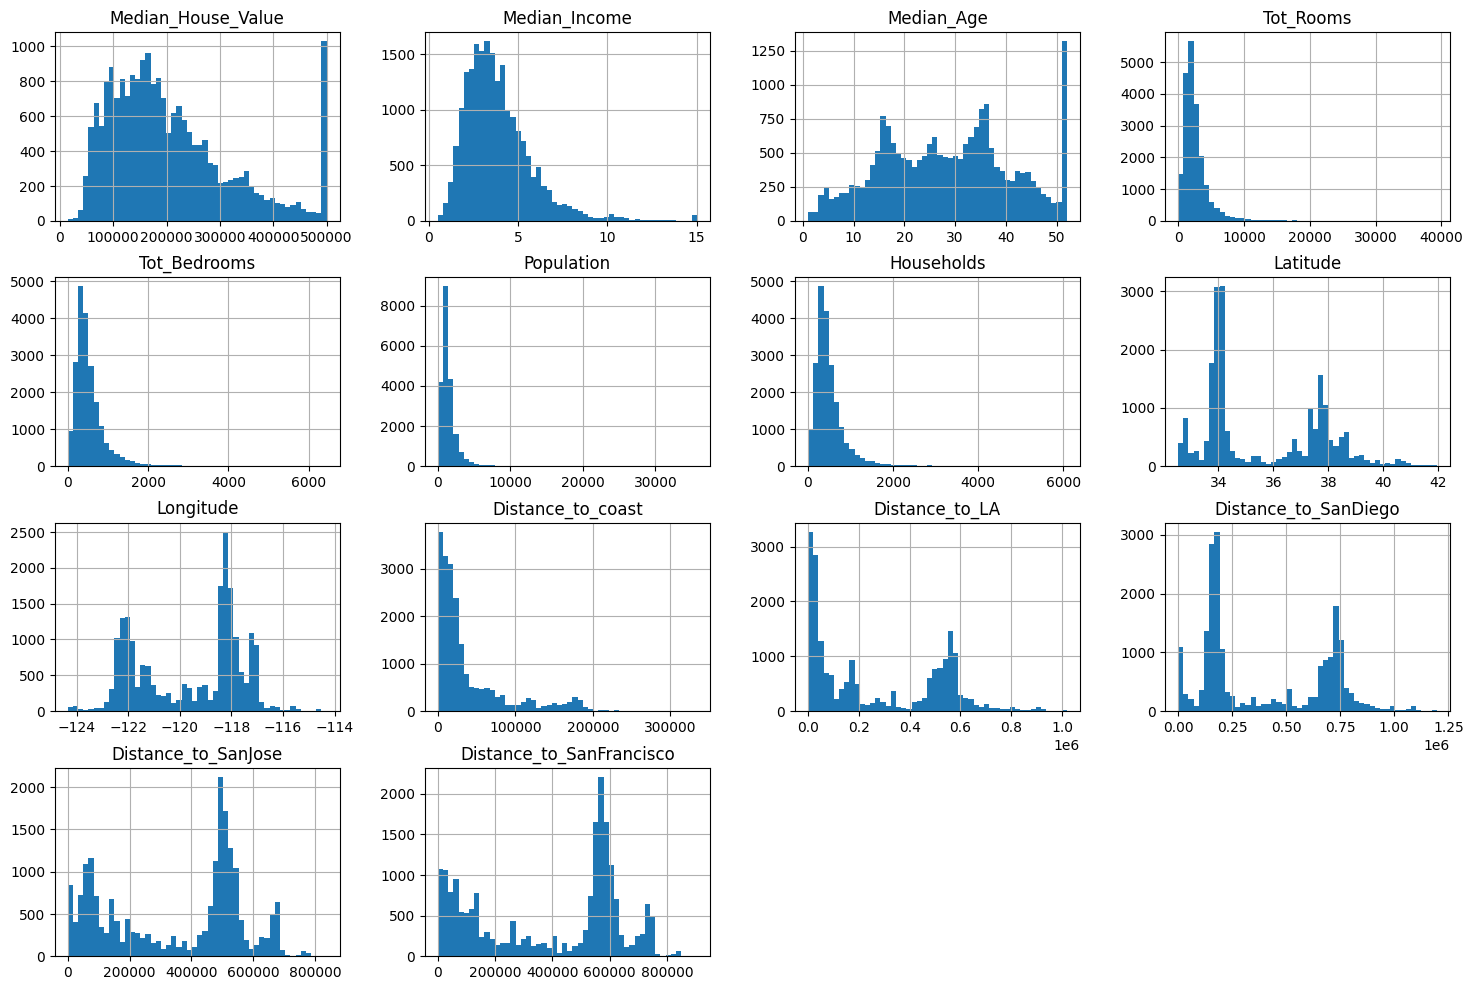

In [21]:
import matplotlib.pyplot as plt

houses_df.hist(bins=50, figsize=(18,12))
plt.show()

# Outlier Detection
We can observe that there is a large difference between `75%` and `max` values of **Tot_Rooms**, **Tot_Bedrooms**, **Population**, and **Households** - which confirms our intuition about the presence of outliers or extreme values in these features.

In [22]:
houses_df.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


# Visualizing Geographical Data

California Housing Prices Map: red is expensive, blue is cheap, larger circles indicate areas with a larger population

This image tells us that the housing prices are very much related to the location and to the population density.

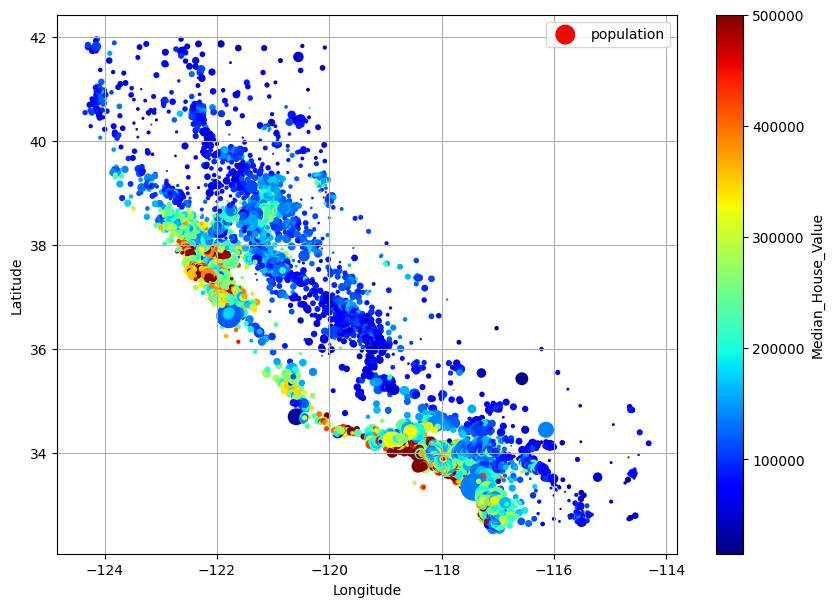

In [23]:
houses_df.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,s=houses_df["Population"]/100, label="population", c="Median_House_Value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7))
plt.show()

# Look for Correlations

Since the dataset is not too large, we can easily compute the correlation coefficient between every pair of features.
The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.\
When the coefficient is close to -1, it means that there is a strong negative correlation. And coefficient close to 0 mean that there is no linear correlation.

In [24]:
corr_matrix = houses_df.corr()
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

# Feature Engineering

## Experiment with Attribute Aggregation

we observe that:
* the **Bedrooms_Ratio** is much more correlated with the **Median_House_Value** than the total number of rooms or bedrooms.\
Apparently houses with a lower bedroom/room ratio tend to be more expensive.
* The number of rooms per household is also more informative than the total number of rooms in a district

So we could drop the **Tot_Rooms**, **Tot_Bedrooms** features and replace them with the newly created ones.

In [25]:
houses_df['Rooms_Per_House'] = houses_df['Tot_Rooms'] / houses_df['Households']
houses_df['Bedrooms_Ratio'] = houses_df['Tot_Bedrooms'] / houses_df['Tot_Rooms']
houses_df['People_Per_House'] = houses_df['Population'] / houses_df['Households']

corr_matrix = houses_df.corr()
corr_matrix["Median_House_Value"].sort_values(ascending=False)

Median_House_Value          1.000000
Median_Income               0.688075
Rooms_Per_House             0.151948
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
People_Per_House           -0.023737
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Bedrooms_Ratio             -0.255624
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

## Save new Dataset

In [26]:
from sklearn.model_selection import train_test_split

train_save_path = "../../dataset/processed/California_Houses_Processed_Train.csv"
test_save_path = "../../dataset/processed/California_Houses_Processed_Test.csv"
houses_df.drop(columns=["Tot_Rooms", "Tot_Bedrooms"], inplace=True)

train_set, test_set = train_test_split(houses_df, test_size=0.2, random_state=42)

train_set.to_csv(train_save_path, index=False)
test_set.to_csv(test_save_path, index=False)